In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os

In [23]:
df=pd.read_excel("Street light Complaint Details last 6 Month.xlsx")

In [24]:
df.describe()

,8835216789
count,1.048575e+06
mean,8.835217e+09
std,2.775957e-02
min,8.835217e+09
25%,8.835217e+09
50%,8.835217e+09
75%,8.835217e+09
max,8.835217e+09


In [25]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 1048575
Number of Cols: 28


In [26]:
df.head(4)

,,Agent,Call Status,Date of Call,Language Preference,Unique Query Number,8835216789,sumit anand,Address,Landmark,...,Street Ligh Pole No,Street Ligh Ticket Type,Street Ligh Assigned To,Street Ligh Complaint From,Answer given by call center Agent,Date of Escalation,Answer given by Level 2,Date of reply by Level 2,Escalate To,Date of Call Closer
0,2019-01-04,WEBCONSUMER,OPEN,2019-01-04,ENGLISH,SLUP00104413,8835216789,sumit anand,C 12/15 LAHANGPURA VARANASU,DR IQBAL,...,-,CABLES/POWER SUPPLY,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-03,WEBCONSUMER,OPEN,2018-12-03,ENGLISH,SLUP00098562,8835216789,sumit anand,"DIDAYAL NAGAR, DURGAKUND ,VARANASI -231005",DIDAYALNAGAR UDAYAN ( PARK .),...,NaN,CABLES/POWER SUPPLY,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-14,WEBCONSUMER,OPEN,2018-11-14,ENGLISH,SLGJ00040122,8835216789,sumit anand,"PLOT NO. 1270/A1,SECTOR-3/A, GANDHINAGAR",NaN,...,138,LAMP,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-20,WEBCONSUMER,OPEN,2018-11-20,ENGLISH,SLGJ00040291,8835216789,sumit anand,GOLD COIN HIGHMAST BLINKING,GOLD COIN HIGHMAST BLINKING,...,NaN,NaN,NaN,RESIDENT,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index([                              '   ',
                                   'Agent',
                             'Call Status',
                            'Date of Call',
                     'Language Preference',
                     'Unique Query Number',
                                8835216789,
                             'sumit anand',
                                 'Address',
                                'Landmark',
                                'District',
                                   'State',
                               'Call Type',
                                  'Scheme',
                                  'Source',
                        'Street Ligh Zone',
                     'Street Ligh ULBName',
                     'Street Ligh Ward No',
                     'Street Ligh Pole No',
                 'Street Ligh Ticket Type',
                 'Street Ligh Assigned To',
              'Street Ligh Complaint From',
       'Answer given by call cen

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)



In [29]:
stopwords={'a', 'Name', 'NR', 'Primary', 'Pole', 
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves','NaN',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't","District", 'Length'
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',"Source", 
 "you'd",
 "you'll",
 "you're","Behind",
 "you've",
 'your',
 'yours','dtype','object', 
 'yourself',
 'yourselves'}



In [32]:
df.columns

Index([                              '   ',
                                   'Agent',
                             'Call Status',
                            'Date of Call',
                     'Language Preference',
                     'Unique Query Number',
                                8835216789,
                             'sumit anand',
                                 'Address',
                                'Landmark',
                                'District',
                                   'State',
                               'Call Type',
                                  'Scheme',
                                  'Source',
                        'Street Ligh Zone',
                     'Street Ligh ULBName',
                     'Street Ligh Ward No',
                     'Street Ligh Pole No',
                 'Street Ligh Ticket Type',
                 'Street Ligh Assigned To',
              'Street Ligh Complaint From',
       'Answer given by call cen

In [31]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
# import re
# from tqdm import tqdm
# from bs4 import BeautifulSoup
# preprocessed_reviews = []
# # tqdm is for printing the status bar
# for sentance in tqdm(df["Address"].values):
# #     sentance = re.sub(r"http\S+", "", sentance)
# #     sentance = BeautifulSoup(sentance, 'lxml').get_text()
#     sentance = decontracted(sentance)
#     sentance = re.sub("\S*\d\S*", "", sentance).strip()
#     sentance = re.sub('[^A-Za-z]+', ' ', sentance)
#     # https://gist.github.com/sebleier/554280
#     sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
#     preprocessed_reviews.append(sentance.strip())

In [33]:
X=df["Address"]

In [34]:

# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
X_train=X[:100000]
X_test=X[100000:]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()



# bow = CountVectorizer(strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None)
# X_train_bow=bow.fit_transform(X_train)
# X_test_bow=bow.transform(X_test)

In [35]:
x_train_tfidf = v.fit_transform(X_train.values.astype('U'))

In [36]:
x_test_tfidf = v.transform(X_test.values.astype('U'))

MemoryError: 

In [37]:
# from sklearn.cluster import KMeans
# errors=[]
# k_value=[1,2,3,4,5]
# for i in k_value:
#     kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
#     kmeans.fit(x_train_tfidf)
#     pred=kmeans.predict(x_test_tfidf)
#     errors.append(kmeans.inertia_)
# plt.plot(k_value, errors)

In [38]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

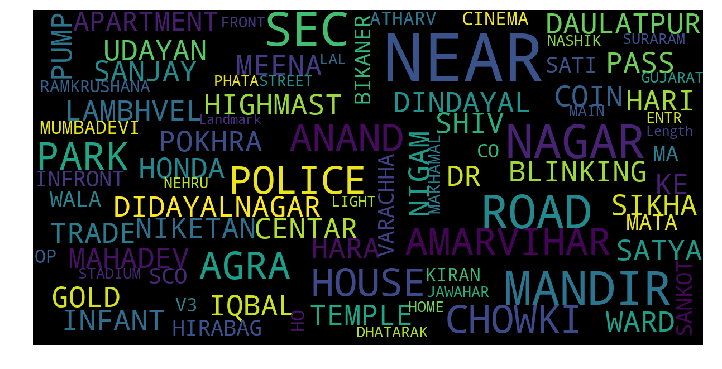

In [39]:
show_wordcloud(df['Landmark'])
# show_wordcloud(Samsung_Reviews_positive['Reviews'])

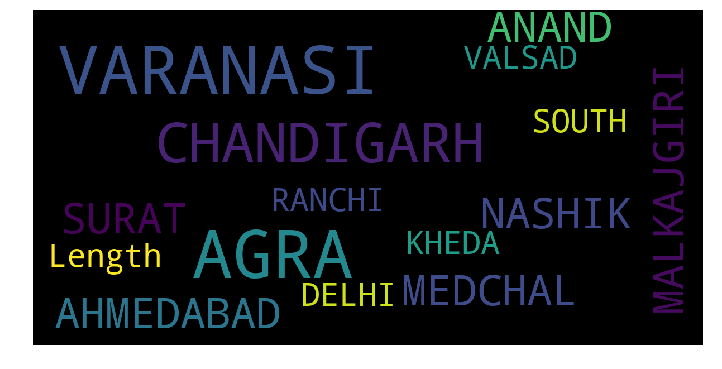

In [40]:
show_wordcloud(df['District'])

In [41]:
# show_wordcloud(df['Source'])

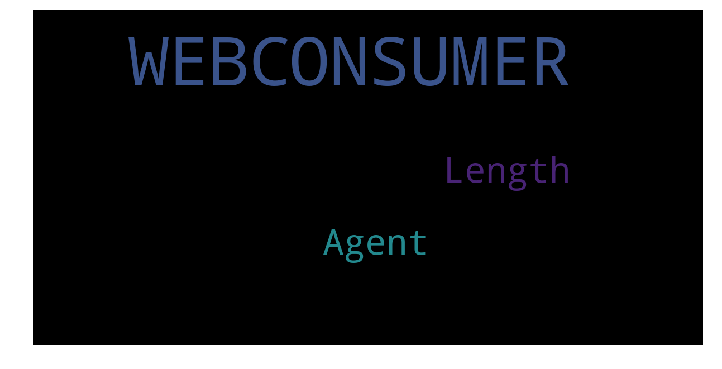

In [42]:
show_wordcloud(df['Agent'])

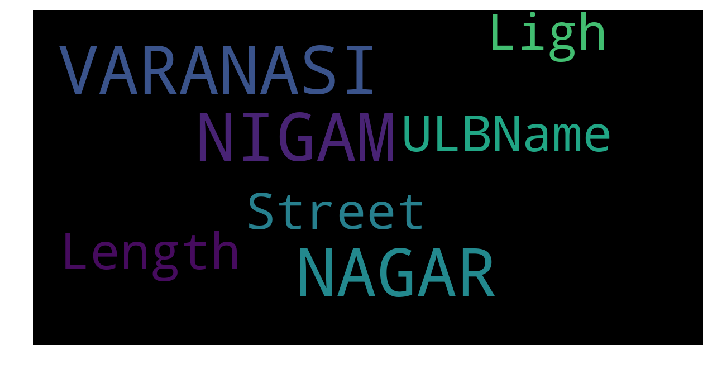

In [43]:
show_wordcloud(df['Street Ligh ULBName'])

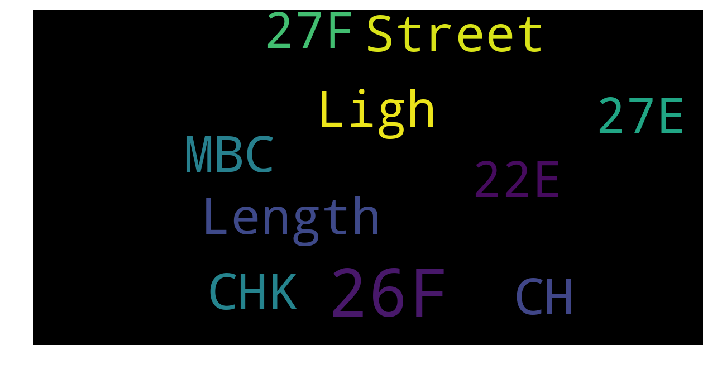

In [44]:
show_wordcloud(df['Street Ligh Pole No'])

In [45]:
# show_wordcloud(df['Date of Call'])

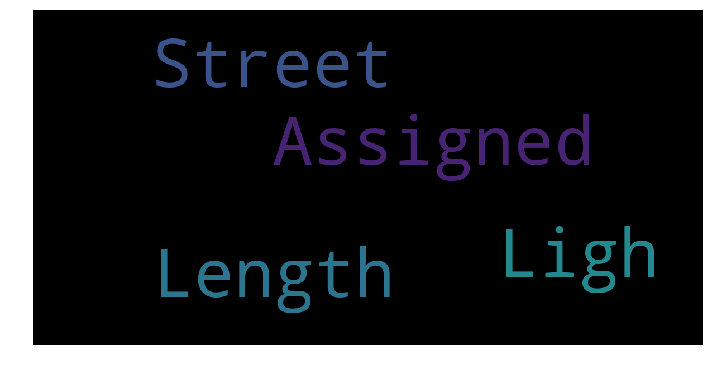

In [46]:
show_wordcloud(df['Street Ligh Assigned To'])

In [47]:
df.columns

Index([                              '   ',
                                   'Agent',
                             'Call Status',
                            'Date of Call',
                     'Language Preference',
                     'Unique Query Number',
                                8835216789,
                             'sumit anand',
                                 'Address',
                                'Landmark',
                                'District',
                                   'State',
                               'Call Type',
                                  'Scheme',
                                  'Source',
                        'Street Ligh Zone',
                     'Street Ligh ULBName',
                     'Street Ligh Ward No',
                     'Street Ligh Pole No',
                 'Street Ligh Ticket Type',
                 'Street Ligh Assigned To',
              'Street Ligh Complaint From',
       'Answer given by call cen

In [48]:
def labeler(x):
    labels_A=[]
    labels_B=[]
    labels_C=[]
    for i in range(x):
        labels_A.append("A_{}".format(i))
    for i in range(x):
        labels_B.append("B_{}".format(i))
    for i in range(x):
        labels_C.append("C_{}".format(i))
    return labels_A+labels_B+labels_C

In [49]:
labeler(10)

['A_0',
 'A_1',
 'A_2',
 'A_3',
 'A_4',
 'A_5',
 'A_6',
 'A_7',
 'A_8',
 'A_9',
 'B_0',
 'B_1',
 'B_2',
 'B_3',
 'B_4',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'C_0',
 'C_1',
 'C_2',
 'C_3',
 'C_4',
 'C_5',
 'C_6',
 'C_7',
 'C_8',
 'C_9']

In [50]:
 a=labeler(10)*52388


In [51]:
# type(a)

In [52]:
df.shape
# df['label']=
df1 = pd.DataFrame({'label': a})

In [53]:
df1

,label
0,A_0
1,A_1
2,A_2
3,A_3
4,A_4
5,A_5
6,A_6
7,A_7
8,A_8
9,A_9


In [54]:
df['label']= ''

In [55]:
df['label']= df1['label']

In [56]:
df.fillna(0.0)

,,Agent,Call Status,Date of Call,Language Preference,Unique Query Number,8835216789,sumit anand,Address,Landmark,...,Street Ligh Ticket Type,Street Ligh Assigned To,Street Ligh Complaint From,Answer given by call center Agent,Date of Escalation,Answer given by Level 2,Date of reply by Level 2,Escalate To,Date of Call Closer,label
0,2019-01-04 00:00:00,WEBCONSUMER,OPEN,2019-01-04 00:00:00,ENGLISH,SLUP00104413,8835216789,sumit anand,C 12/15 LAHANGPURA VARANASU,DR IQBAL,...,CABLES/POWER SUPPLY,0,RESIDENT,0,0,0,0,0,0,A_0
1,2018-12-03 00:00:00,WEBCONSUMER,OPEN,2018-12-03 00:00:00,ENGLISH,SLUP00098562,8835216789,sumit anand,"DIDAYAL NAGAR, DURGAKUND ,VARANASI -231005",DIDAYALNAGAR UDAYAN ( PARK .),...,CABLES/POWER SUPPLY,0,RESIDENT,0,0,0,0,0,0,A_1
2,2018-11-14 00:00:00,WEBCONSUMER,OPEN,2018-11-14 00:00:00,ENGLISH,SLGJ00040122,8835216789,sumit anand,"PLOT NO. 1270/A1,SECTOR-3/A, GANDHINAGAR",0,...,LAMP,0,RESIDENT,0,0,0,0,0,0,A_2
3,2018-11-20 00:00:00,WEBCONSUMER,OPEN,2018-11-20 00:00:00,ENGLISH,SLGJ00040291,8835216789,sumit anand,GOLD COIN HIGHMAST BLINKING,GOLD COIN HIGHMAST BLINKING,...,0,0,RESIDENT,0,0,0,0,0,0,A_3
4,2018-11-23 00:00:00,WEBCONSUMER,OPEN,2018-11-23 00:00:00,ENGLISH,SLUP00096530,8835216789,sumit anand,BADA LALPUR,TRADE CENTAR KE PASS,...,OTHERS,0,RESIDENT,0,0,0,0,0,0,A_4
5,2018-11-26 00:00:00,WEBCONSUMER,OPEN,2018-11-26 00:00:00,ENGLISH,SLGJ00040421,8835216789,sumit anand,"KRISHNA TOWNSHIP, NEAR JOGNIMATA TEMPLE,",ANAND-LAMBHVEL ROAD,...,0,0,RESIDENT,0,0,0,0,0,0,A_5
6,2018-12-03 00:00:00,WEBCONSUMER,OPEN,2018-12-03 00:00:00,ENGLISH,SLGJ00040686,8835216789,sumit anand,BEHIND MAHADEV TEMPLE CHAMUNDA CHAWK CHAKLASHI,BEHIND MAHADEV TEMPLE,...,LAMP,0,RESIDENT,0,0,0,0,0,0,A_6
7,2018-12-09 00:00:00,WEBCONSUMER,OPEN,2018-12-09 00:00:00,ENGLISH,SLUP00099744,8835216789,sumit anand,30 JAWAHERBAGH DAYALBAGH AGRA,NEAR AMARVIHAR POLICE CHOWKI,...,0,0,RESIDENT,0,0,0,0,0,0,A_7
8,2018-12-09 00:00:00,WEBCONSUMER,OPEN,2018-12-09 00:00:00,ENGLISH,SLUP00099745,8835216789,sumit anand,30JAWAHAR BAGH DAYALBAGH AGRA,NEAR AMARVIHAR POLICE CHOWKI AGRA,...,0,0,RESIDENT,0,0,0,0,0,0,A_8
9,2018-12-10 00:00:00,WEBCONSUMER,OPEN,2018-12-10 00:00:00,ENGLISH,SLGJ00040911,8835216789,sumit anand,"KUVAVALI POLE,NR HALIM NI KHADKI SHAHPUR,AHMED...",NR MEENA HOUSE,...,OTHERS,0,RESIDENT,0,0,0,0,0,0,A_9
